In [1]:
%matplotlib inline
import sklearn
from sklearn import manifold
from sklearn import datasets
from sklearn.utils.extmath import safe_sparse_dot
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from sklearn.metrics import pairwise_distances_argmin
import math
import pandas as pd
import random
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import os
import time
pd.__version__
matplotlib.__version__
np.__version__
sklearn.__version__

C:\Users\Florian\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


'0.23.2'

In [2]:
parentDir = "results"
if not os.path.exists(parentDir):
    os.mkdir(parentDir)

In [3]:
def euclidean_distance(vector_0, vector_1):
    total = 0
    diff = 0
    for a in range(len(vector_0)):
        diff = vector_1[a] - vector_0[a]
        total = total + diff * diff
    return math.sqrt(total)

In [4]:
def squared_euclidean_distance(vector_0, vector_1):
    total = 0
    diff = 0
    for a in range(len(vector_0)):
        diff = vector_1[a] - vector_0[a]
        total = total + diff * diff
    return total

In [5]:
def chebyshev_distance(vector_0, vector_1):
    currentMaxResult = abs(vector_1[0] - vector_0[0])
    for a in range(1,len(vector_1)):
        tmpResult = abs(vector_1[a] - vector_0[a])
        if(currentMaxResult < tmpResult):
            currentMaxResult = tmpResult
    return currentMaxResult

In [6]:
def manhatten_distance(vector_0, vector_1):
    total = 0
    diff = 0
    for a in range(len(vector_0)):
        diff = abs(vector_0[a] - vector_1[a])
        total = total + diff
    return total

In [7]:
def generate_squared_matrix(row_column_number):
    return np.linspace(0, 1000, row_column_number * row_column_number, endpoint=True).reshape(row_column_number,row_column_number)

In [8]:
def generate_2d_dataset(row_number):
    return np.linspace(0, 1000, row_number*2*2, endpoint=True).reshape(-1,2,2)

In [9]:
generate_2d_dataset(5)

array([[[   0.        ,   52.63157895],
        [ 105.26315789,  157.89473684]],

       [[ 210.52631579,  263.15789474],
        [ 315.78947368,  368.42105263]],

       [[ 421.05263158,  473.68421053],
        [ 526.31578947,  578.94736842]],

       [[ 631.57894737,  684.21052632],
        [ 736.84210526,  789.47368421]],

       [[ 842.10526316,  894.73684211],
        [ 947.36842105, 1000.        ]]])

In [10]:
def generate_sample_list(number_of_matrices, matrix_generator_function, step_range):
    matrix_list = []
    # step values has to be dividable by 2 since 2d_dataset tries to reshape(x,2)
    # and that might not be possible otherwise
    for a in range(0, number_of_matrices*step_range, step_range):
        matrix_list.append(matrix_generator_function(a))
    return matrix_list

In [11]:
def calculate_distances(list_data_tuples, distance_measure):
    # iterate over b number of data in the current benchmark a
    for b in list_data_tuples:
        distance_measure(b[0], b[1])

In [12]:
def benchmark_distance_measure(benchmark_data, distance_measure):
    benchmark_results = []
    # iterate over the a individual benchmarks, each benchmark has b number of data
    for list_data_tuples in benchmark_data:
        start = time.time()
        calculate_distances(list_data_tuples, distance_measure)
        end = time.time()
        benchmark_results.append([distance_measure.__name__, len(list_data_tuples), end-start])
    return benchmark_results

In [18]:
distance_function = [euclidean_distance, squared_euclidean_distance, chebyshev_distance, manhatten_distance]
overall_results = []
for function in distance_function:
    benchmark_result = benchmark_distance_measure(generate_sample_list(21, generate_2d_dataset, 100000), function)
    overall_results.append(benchmark_result)

In [19]:
overall_results

[[['euclidean_distance', 0, 0.0],
  ['euclidean_distance', 100000, 0.26982569694519043],
  ['euclidean_distance', 200000, 0.5347068309783936],
  ['euclidean_distance', 300000, 0.8365199565887451],
  ['euclidean_distance', 400000, 1.1703150272369385],
  ['euclidean_distance', 500000, 1.3848021030426025],
  ['euclidean_distance', 600000, 1.6740643978118896],
  ['euclidean_distance', 700000, 1.9819624423980713],
  ['euclidean_distance', 800000, 2.2740283012390137],
  ['euclidean_distance', 900000, 2.5238661766052246],
  ['euclidean_distance', 1000000, 2.857118844985962],
  ['euclidean_distance', 1100000, 3.1673073768615723],
  ['euclidean_distance', 1200000, 3.6223807334899902],
  ['euclidean_distance', 1300000, 3.894120931625366],
  ['euclidean_distance', 1400000, 4.1319544315338135],
  ['euclidean_distance', 1500000, 4.221956968307495],
  ['euclidean_distance', 1600000, 4.499501466751099],
  ['euclidean_distance', 1700000, 4.528172731399536],
  ['euclidean_distance', 1800000, 5.11253595

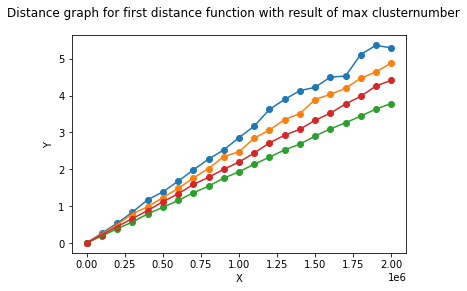

In [20]:
df_tmp = pd.DataFrame({"number_vectorpairs": [tmp[1] for tmp in overall_results[0]]})

fig = plt.figure()
fig.suptitle('Distance graph for first distance function with result of max clusternumber')
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
# x scale is the same across all measures
x = [tmp[1] for tmp in overall_results[0]]
for a in overall_results:
    y = [tmp[2] for tmp in a]
    
    df_tmp = df_tmp.join(pd.DataFrame({"function_" + a[0][0] + "_y": y}))
    
    ax.scatter(x,y)
    ax.plot(x,y, label=a[0][0])
#plt.legend(loc="upper right")
plt.savefig('performance_distance_measure.pdf')
df_tmp.to_csv(parentDir + "/performance_distance_measure.csv", sep="\t", encoding="utf-8")